In [14]:
%pip install -r "requirements.txt"

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 4.6 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.1 MB 10.6 MB/s eta 0:00:01
   ------------------- -------------------- 5.5/11.1 MB 11.1 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.1 MB 8.4 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.1 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 9.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   -- ------------------------------------- 2.9/41.0 MB 13.6 MB/s eta 0:00:03
   ----- ---------------------------------- 5.5/41.0 MB 13.3 MB/s eta 0:00:03
   ------- -------------------------------- 8.1/41.0 MB 12.6 MB/s eta 0:00:03
   ---------- ----------------------------- 10.7/41.0 MB 12.7 MB/s eta 0:00:03
   -

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("data/customer_service/train.csv")

# Data Exploration 
Checked the overall information about the dataset

In [48]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   issue_area                   970 non-null    object
 1   issue_category               970 non-null    object
 2   issue_sub_category           970 non-null    object
 3   issue_category_sub_category  970 non-null    object
 4   customer_sentiment           970 non-null    object
 5   product_category             970 non-null    object
 6   product_sub_category         970 non-null    object
 7   issue_complexity             970 non-null    object
 8   agent_experience_level       970 non-null    object
 9   agent_experience_level_desc  970 non-null    object
 10  conversation                 970 non-null    object
 11  conversation_length          970 non-null    int64 
dtypes: int64(1), object(11)
memory usage: 91.1+ KB


,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation,conversation_length
count,970,970,970,970,970,970,970,970,970,970,970,970.000000
unique,6,40,109,109,3,3,50,3,3,3,968,NaN
top,Cancellations and returns,Return and Exchange,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Bp Monitor,less,junior,"handles customer inquiries independently, poss...","Agent: You're welcome, Jane. Have a great day!",NaN
freq,277,92,17,17,542,454,26,472,490,490,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2164.289691
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,572.653613
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1791.250000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2091.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2471.750000


Checked the percantages of the different sentiments. It is observed that positive sentiments are very rare.

In [49]:
df["customer_sentiment"].value_counts(normalize=True) * 100

customer_sentiment
neutral     55.876289
negative    42.371134
positive     1.752577
Name: proportion, dtype: float64

Checked the issue complexity vs customer sentiment. It was seen that negative sentiment increases as the issue complexity increases.

In [50]:
pd.crosstab(df["issue_complexity"], df["customer_sentiment"])

customer_sentiment,negative,neutral,positive
issue_complexity,,,
high,39,40,3
less,197,268,7
medium,175,234,7


Similarly, agent experience level vs customer sentiment is examined. Suprisingly, the experience level doesn't have a big affect on the customer sentiment.

In [51]:
pd.crosstab(df["agent_experience_level"], df["customer_sentiment"])

customer_sentiment,negative,neutral,positive
agent_experience_level,,,
experienced,147,188,4
inexperienced,47,93,1
junior,217,261,12


In [52]:
complexity_sentiment = df.groupby("issue_complexity")["customer_sentiment"].value_counts(normalize=True).unstack() * 100
print(complexity_sentiment)
print("\n")
experience_sentiment = df.groupby("agent_experience_level")["customer_sentiment"].value_counts(normalize=True).unstack() * 100
print(experience_sentiment)

customer_sentiment   negative    neutral  positive
issue_complexity                                  
high                47.560976  48.780488  3.658537
less                41.737288  56.779661  1.483051
medium              42.067308  56.250000  1.682692


customer_sentiment       negative    neutral  positive
agent_experience_level                                
experienced             43.362832  55.457227  1.179941
inexperienced           33.333333  65.957447  0.709220
junior                  44.285714  53.265306  2.448980


The lengths of the conversations are inspected. It was seen that the conversations are longer when the customer sentiment is negative.

In [53]:
df["conversation_length"] = df["conversation"].apply(len)
df.groupby("customer_sentiment")["conversation_length"].mean()

customer_sentiment
negative    2433.912409
neutral     1973.374539
positive    1732.588235
Name: conversation_length, dtype: float64

# Data preparation 
Customer service data is preprocessed and saved as .npy files. Here, only the replies given by the users excluding the last reply are taken and saved as X_train and X_val. Also, their corresponding labels (sentiments) are encoded into integer and they are saved as y_train and y_val.

In [69]:
!python data/customer_service/prepare.py

Train dataset size: 773
Validation dataset size: 194
Test dataset size: 30


In [58]:
import wandb
import os
wandb.login(key=os.getenv("WANDB_API"))



True

In [70]:
!python train.py config/train_sentiment_analysis.py --compile=False

Overriding config with config/train_sentiment_analysis.py:

c:\Users\user\Desktop\DI725-Assignment-1\train.py:213: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.

# train a miniature character-level shakespeare model

  scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))


wandb: Currently logged in as: ahmetbekcan (DI725-2299436) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin

# good for debugging and playing on macbooks and such

wandb: Tracking run with wandb version 0.19.8

out_dir = 'out-sentiment-analysis'

wandb: Run data is saved locally in c:\Users\user\Desktop\DI725-Assignment-1\wandb\run-20250403_130706-qjy4vvxc


eval_interval = 100  # decreased to prevent overfitting

wandb: Run `wandb offline` to turn off syncing.

eval_iters = 200

wandb: Syncing run mini-gpt-train

log_interval = 50 


wandb:  View project at https://wandb.ai/DI725-2299436/sentiment-analysis


wandb:  View run at https://wandb.ai/DI725-2299436/sentiment-analysis/runs/qjy4vvxc

always_save_checkpoint = False



wandb_log = True
wandb_project = 'sentiment-analysis'
wandb_run_name = 'mini-gpt-train'

dataset = 'customer_service'
gradient_accumulation_steps = 1
batch_size = 8
block_size = 256

sentiment_classifier = True # it will change the model implementation

n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-4 # decreased since dataset is small
max_iters = 2000
lr_decay_iters = 2000 
min_lr = 1e-5  # learning_rate / 10 usually
beta2 = 0.99 

warmup_iters = 100

# on macbook also add
# device = 'cpu'  # run on cpu only
# compile = False # do not torch compile the model

Overriding: compile = False
tokens per iteration will be: 2,048
found vocab_size = 88 (inside data\customer_service\meta.pkl)
Initializing a new model from scratch
number of parameters: 10.66M
num decayed parameter tensors: 27, with 10,750,080 parameters
num non-decayed parameter tensors: 13, with 4,992 parameters
using fused AdamW: True
step 0: train loss 1.0655, val loss 1.0665
iter 0: loss 1.0674, time

In [97]:
import torch
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from model import GPT
from torch.nn.utils.rnn import pad_sequence

def evaluate_model(model: GPT, X_test_path, y_test_path, device='cpu'):
    """
    Evaluate the model and print the success rate and confusion matrix.
    
    Args:
    - model: The trained model (e.g., GPT).
    - X_test_path: Path to the test input data (X_test binary pickle file).
    - y_test_path: Path to the test labels (y_test binary pickle file).
    - device: The device to run the model on ('cpu' or 'cuda').
    - block_size: Maximum sequence length for padding.
    
    Returns:
    - success_rate: The percentage of correct predictions.
    """
    
    # Load the test data (X_test and y_test) using pickle
    with open(X_test_path, 'rb') as f:
        X_test = pickle.load(f)
    
    with open(y_test_path, 'rb') as f:
        y_test = pickle.load(f)
    
    # Ensure the model is in evaluation mode
    model.eval()

    # Pad sequences to ensure uniform length
    padded_X_test = pad_sequence([torch.tensor(seq, dtype=torch.long) for seq in X_test], batch_first=True, padding_value=0)
    block_size = model.config.block_size
    # If the sequences are longer than block_size, truncate them
    padded_X_test = padded_X_test[:, :block_size]
    
    # Move data to the correct device (CPU or GPU)
    X_test_tensor = padded_X_test.to(device)  # Shape: (num_samples, seq_len)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)  # Shape: (num_samples,)
    
    # Make predictions
    with torch.no_grad():
        logits, _ = model(X_test_tensor)  # Assuming output shape is (num_samples, seq_len, num_classes)
        logits = logits[:, -1, :]  # Only take the logits for the last token (sentiment prediction)
        
        # Apply softmax to get probabilities and then get the predicted class
        probs = torch.softmax(logits, dim=-1)
        predictions = torch.argmax(probs, dim=-1)
    
    # Convert predictions to numpy arrays for further analysis
    predictions_np = predictions.cpu().numpy()
    
    # Calculate success rate
    correct_predictions = (predictions_np == y_test_tensor.cpu().numpy()).sum()
    total_predictions = len(y_test)
    success_rate = correct_predictions / total_predictions * 100
    
    print(f"Success Rate: {success_rate:.2f}%")
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, predictions_np)
    
    # Plot confusion matrix using seaborn
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    return success_rate, cm

In [ ]:
import torch

# Assuming the GPT class and its configurations have been defined as in your script
from model import GPT, GPTConfig  # Replace with the correct import path

def load_model_from_checkpoint(ckpt_path, device='cpu'):
    # Load the checkpoint
    checkpoint = torch.load(ckpt_path, map_location=device)
    
    # Get the saved model configuration
    model_args = checkpoint['model_args']  # or checkpoint['config'], if you saved it under 'config'
    
    # Initialize the model with the saved configuration
    config = GPTConfig(**model_args)  # Use the saved arguments to create the model configuration
    model = GPT(config).to(device)  # Reinitialize the model
    
    # Load the model's state dictionary from the checkpoint
    model.load_state_dict(checkpoint['model'])
    
    # Optionally load the optimizer state if you're planning to resume training
    # optimizer.load_state_dict(checkpoint['optimizer'])  # Uncomment if needed
    
    # Set the model to evaluation mode (optional, for inference)
    model.eval()
    
    print(f"Model loaded from checkpoint: {ckpt_path}")
    
    return model

number of parameters: 10.66M
Model loaded from checkpoint: out-sentiment-analysis/ckpt.pt
Success Rate: 33.33%


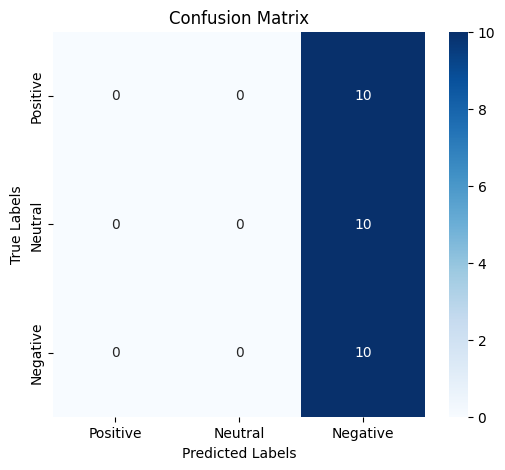

(np.float64(33.33333333333333),
 array([[ 0,  0, 10],
        [ 0,  0, 10],
        [ 0,  0, 10]]))

In [98]:
device = "cuda" if torch.cuda.is_available else "cpu"
model = load_model_from_checkpoint('out-sentiment-analysis/ckpt.pt', device=device)
evaluate_model(model, "data/customer_service/X_test.bin","data/customer_service/y_test.bin", device=device)